In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import sys # delete later
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from astropy.io import fits
from astropy.visualization import make_lupton_rgb

In [2]:
filepath = '/Users/gilliancartwright/Desktop/Deep Learning and Image Segmentation/'
filename = filepath + 'other.fits'
hdu_list = fits.open(filename)
images_sim = hdu_list[1].data
images_lens = hdu_list[2].data
data = pd.DataFrame(hdu_list[3].data)
data = data.drop('TILENAME', axis=1)
hdu_list.close()

coadd_list = data["Y6_COADD_OBJECT_ID"].values.tolist()
numPix = 45

data.head(13)

,Y6_COADD_OBJECT_ID,HPIX_16384,HPIX_4096,DNF_ZMEAN_SOF,RA,DEC,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,FLUX_RADIUS_Z,...,SKYBRITE_WMEAN_G,SKYBRITE_WMEAN_R,SKYBRITE_WMEAN_I,SKYBRITE_WMEAN_Z,Z1,LENSED_MAG,mag_1,ISOLATION,EINSTEIN_RADIUS,MAGNIFICATION
0,1055868383,1183555245,73972202,0.622459,3.970410,-1.711331,5.851654,5.332797,5.040724,4.942529,...,487.955994,1391.640015,3549.209961,7666.879883,1.745235,21.321891,22.772886,0.668650,3.677498,3.805379
1,1011852376,1231477876,76967367,0.101100,352.469894,0.343105,6.604491,6.131225,5.831058,5.666486,...,471.927002,1380.619995,3485.129883,6751.240234,0.626176,20.131395,21.930271,0.676866,2.736300,5.242643
2,1321930648,1165362895,72835180,0.494753,40.121546,1.956542,4.005538,3.645439,3.561624,3.392756,...,483.807007,1176.099976,3728.989990,9374.940430,1.485968,20.760362,23.052933,0.797777,4.495959,8.260917
3,1405107412,2365760919,147860057,0.502313,55.145973,-28.627959,4.442309,4.288599,3.936188,3.994299,...,367.566986,982.726013,3114.419922,8148.229980,1.374741,20.710124,22.732843,0.683100,2.533013,6.442995
4,984393819,1234835829,77177239,0.532497,343.988537,-0.288405,4.721364,4.086586,3.837954,3.756605,...,477.260010,1328.689941,3320.469971,7195.290039,1.362259,20.202368,22.691740,0.944474,5.094188,9.902594
5,1076618555,1184823459,74051466,0.391649,7.614233,1.600918,5.824796,5.219866,4.986630,4.694975,...,440.924011,1207.709961,2765.560059,6454.129883,0.623133,21.471810,23.131670,0.498232,2.720892,4.612580
6,1323167288,1161844157,72615259,0.635092,40.015109,-4.166363,4.805872,4.426740,4.153852,4.122274,...,442.083008,1152.250000,3563.340088,9549.929688,1.362603,20.514274,23.096598,0.739590,2.233504,10.787719
7,956139172,1258958191,78684886,0.149440,335.269314,2.170893,7.395364,6.708816,6.544659,6.345994,...,475.692993,1227.930054,3085.300049,5723.029785,0.844381,20.528958,22.917967,0.783579,5.268263,9.028253
8,1237784601,1167877551,72992346,0.267713,31.213602,0.603276,7.133635,6.364225,6.167515,6.045362,...,506.279999,1235.560059,3686.949951,7553.080078,0.800136,20.188706,21.883366,0.423436,1.773972,4.762815
9,1044503629,1276176818,79761051,0.480455,2.566620,3.288329,4.141036,3.679805,3.482992,3.189992,...,454.752991,1315.469971,3576.219971,7410.729980,0.735697,20.899993,22.337269,0.868851,3.206537,3.757600


In [3]:
def plot_three(img_1, img_2, img_3, titles):
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))

    img1 = ax[0].imshow(img_1)
    plt.colorbar(img1, ax=ax[0])  
    ax[0].set_title(titles[0])
    ax[0].axis('off')


    img2 = ax[1].imshow(img_2)
    plt.colorbar(img2, ax=ax[1])
    ax[1].set_title(titles[1])
    ax[1].axis('off')

    img3 = ax[2].imshow(img_3)
    plt.colorbar(img3, ax=ax[2])
    ax[2].set_title(titles[2])
    ax[2].axis('off')

    plt.show()
    plt.close()

In [4]:
# Makes 3 plots per image: source simulation, lens cutout, complete simulation
def rgb_graphs(name, sim_i, sim_r, sim_g, cutout_i, cutout_r, cutout_g):
    loc = plticker.MultipleLocator(base=3.75)
    fig, ax = plt.subplots(figsize=(15, 4), ncols=3)

    sim_rgb = make_lupton_rgb(sim_i, sim_r, sim_g, Q=11., stretch=40.)
    
    ax[0].set_title('Source(s)')
    ax[0].axis('off')
    original = ax[0].imshow(sim_rgb, aspect='equal')

    cutout_rgb = make_lupton_rgb(cutout_i, cutout_r, cutout_g, Q=11., stretch=40.)
    ax[1].set_title('Lens')
    ax[1].axis('off')
    cutout = ax[1].imshow(cutout_rgb, aspect='equal')
            
    rgb = make_lupton_rgb(sim_i+cutout_i, sim_r+cutout_r, sim_g+cutout_g, Q=11., stretch=40.)
    ax[2].set_title('Complete Simulation')
    ax[2].axis('off')
    projection = ax[2].imshow(rgb, aspect='equal')
   
    plt.show()
    plt.close()


In [9]:
def source_mask(single_band_img):
    # turn 2d image into list
    pix_list = single_band_img.flatten(order='C')
    
    # set threshold to the mean of all pixels
#     threshold = np.mean(pix_list)
    threshold = np.mean(pix_list)

    # iterate through pixels and change values to 0 or mask number
    for i, pix in enumerate(pix_list):
        if pix >= threshold:  # threshold value
            pix_list[i] = 1  # number pixels will be masked to
        else:
            pix_list[i] = 0

    # turn masked list back into 2d image
    masked = np.reshape(pix_list, (45, 45), order='C')
    return masked


In [55]:
def lens_mask(single_band_img):
    # turn 2d image into list
    pix_list = single_band_img.flatten(order='C')
    
    # set threshold to the rms of all pixels
    
#     sorted_pix = np.sort(pix_list)
#     threshold = sorted_pix[int(0.75*len(sorted_pix))]

    threshold = np.mean(pix_list) + np.std(pix_list)
    
    # iterate through pixels and change values to 0 or 2
    for i, pix in enumerate(pix_list):
        if pix > threshold:  # threshold value
            pix_list[i] = 2  # number pixels will be masked to
        else:
            pix_list[i] = 0
    
    # return to 2d form
    init_masked = np.reshape(pix_list, (45, 45), order='C')
    
    # mask outside a certain radius
    center = int(numPix/2), int(numPix/2)
    radius = int(numPix/5)

    Y, X = np.ogrid[:numPix, :numPix]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    circle_mask = dist_from_center <= radius

    masked = init_masked.copy()
    masked[~circle_mask] = 0

    return masked

In [56]:
def mask_image(coadd_id):
    # index data frame by coadd_id
    row = data[data['Y6_COADD_OBJECT_ID'] == coadd_id].index[0]

    # images_sim
    source_g, source_r, source_i = images_sim[row][0], images_sim[row][1], images_sim[row][2]
    lens_g, lens_r, lens_i = images_lens[row][0], images_lens[row][1], images_lens[row][2]
    rgb_graphs('name', source_i, source_r, source_g, lens_i, lens_r, lens_g)

    # apply masks to source and lens
    masked_source = source_mask(source_i)
    masked_lens = lens_mask(lens_i)
    
    # combine masks into one image
    all_masked = np.add(masked_source, masked_lens)
    
    # turn 2d image into list
    pix_list = all_masked.flatten(order='C')
    
    # iterate through pixels and change values to 0 or mask number
    for i, pix in enumerate(pix_list):
        if pix >= 3:  # threshold value
            pix_list[i] = 2  # number pixels will be masked to
        else:
            pix_list[i] = pix_list[i]

    # turn masked list back into 2d image
    masked = np.reshape(pix_list, (45, 45), order='C')

    # plot
    plot_three(masked_source, masked_lens, masked, ['Source Mask',
                                                        'Lens Mask',
                                                        'All Masks'
                                                       ])

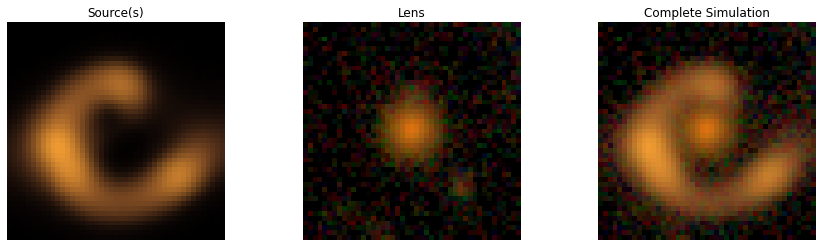

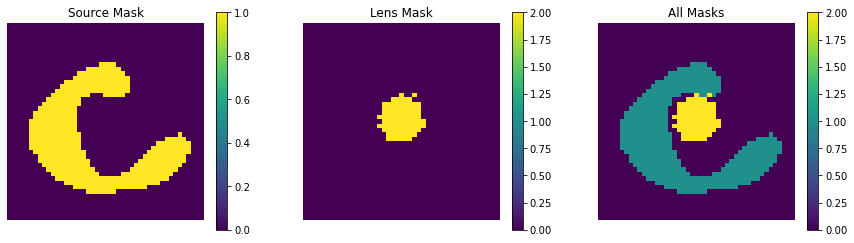

In [57]:
mask_image(1104661406)

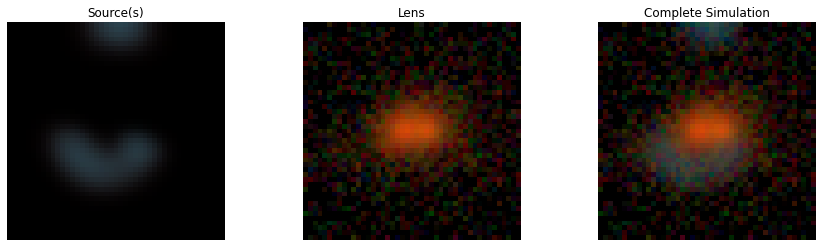

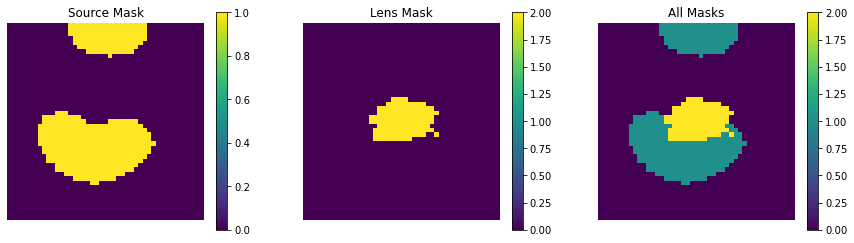

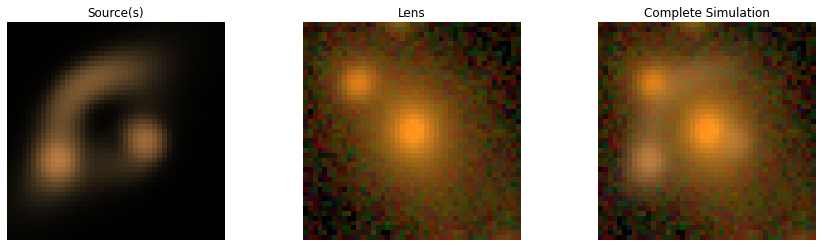

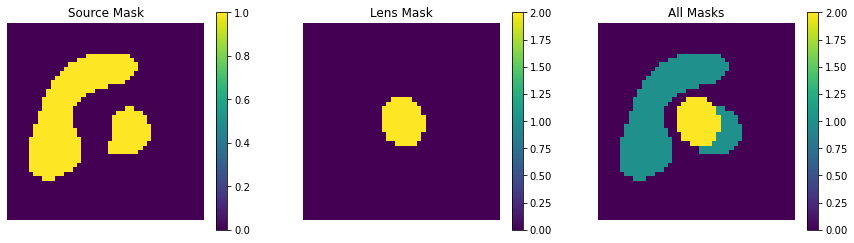

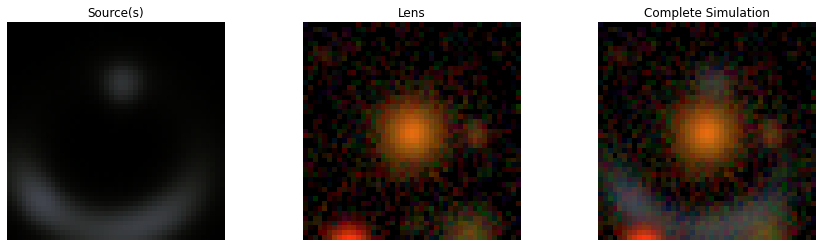

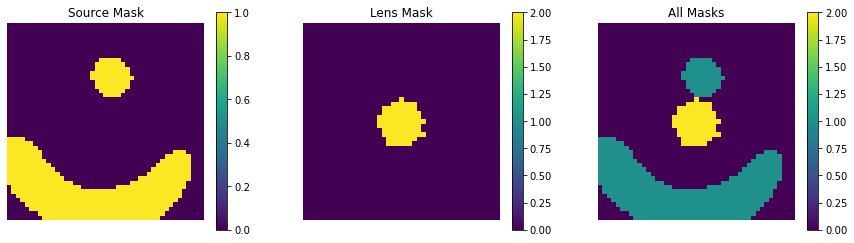

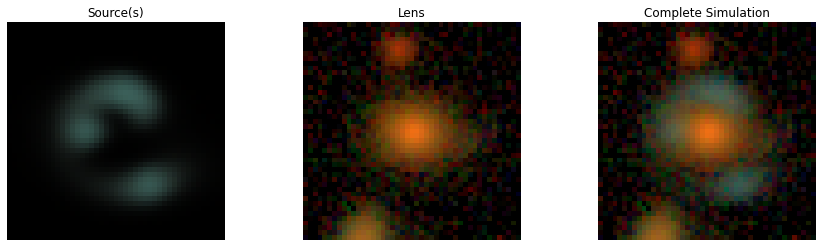

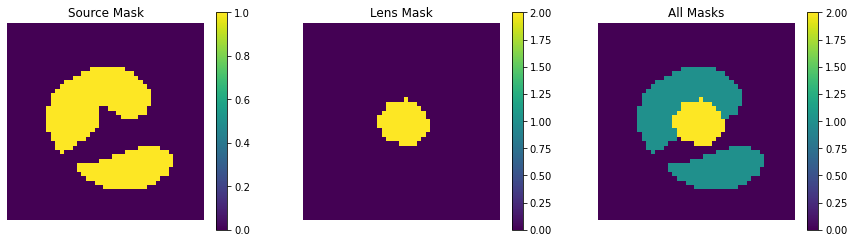

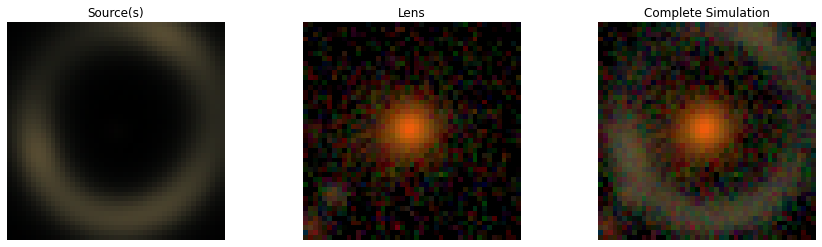

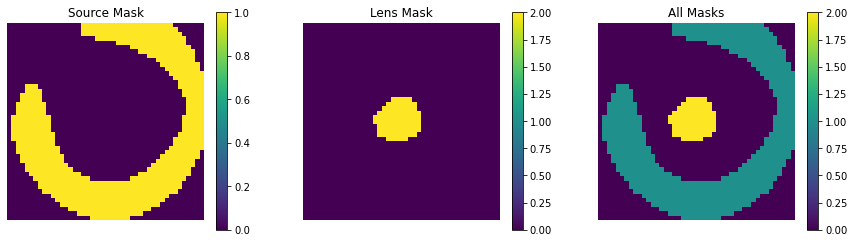

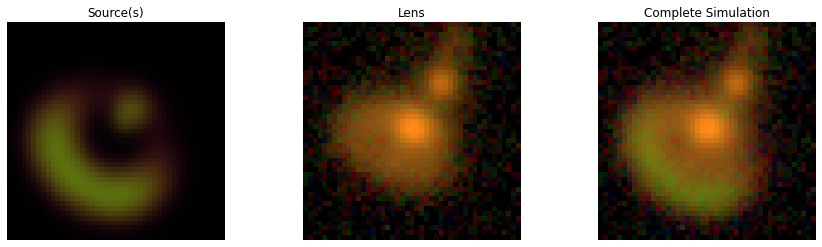

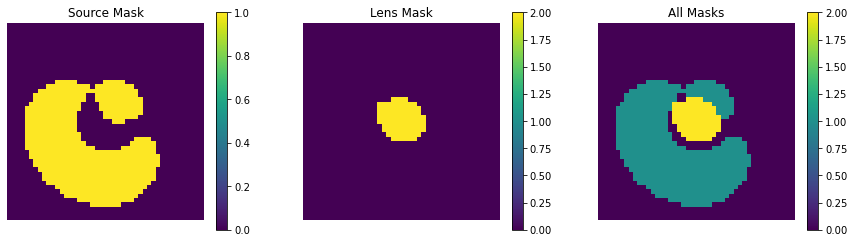

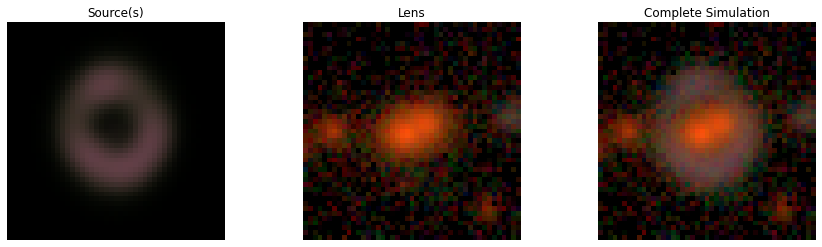

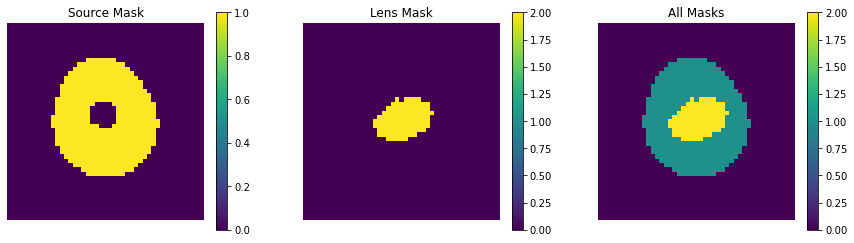

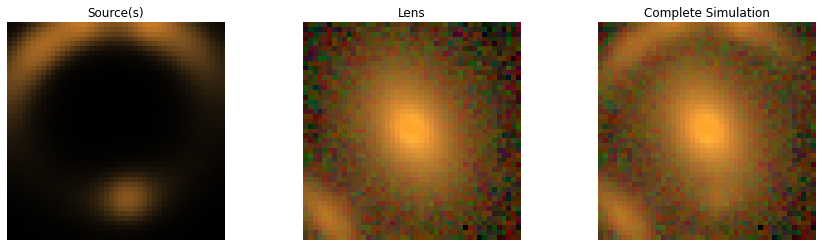

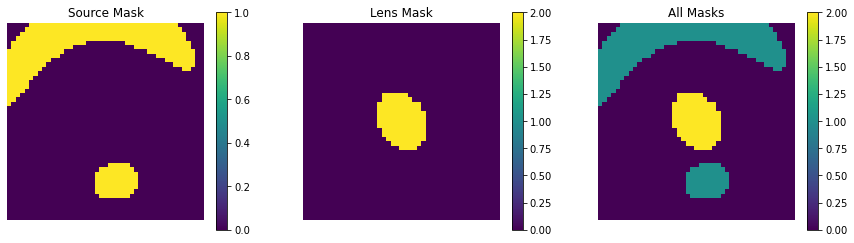

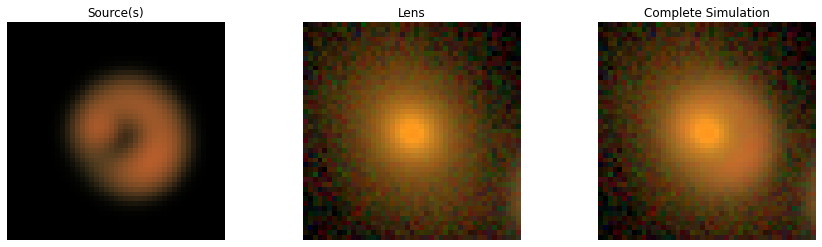

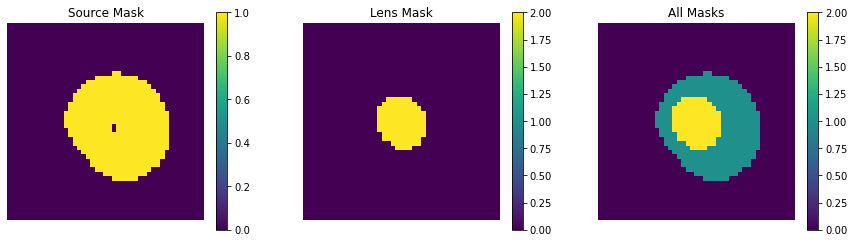

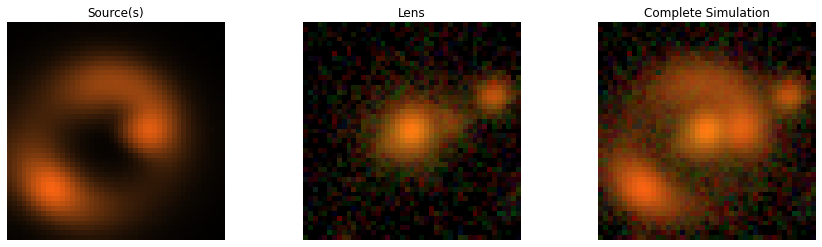

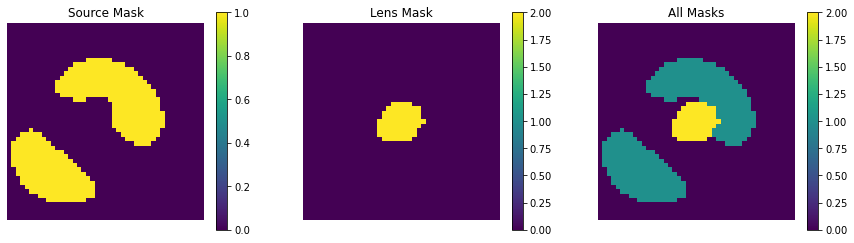

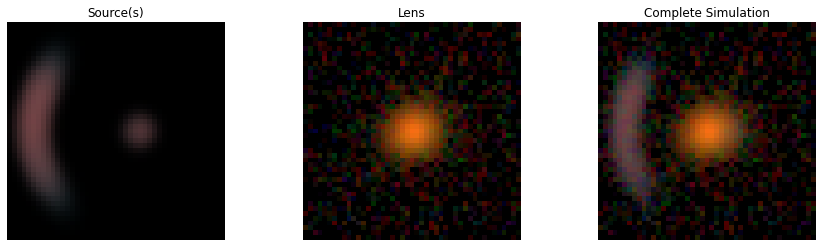

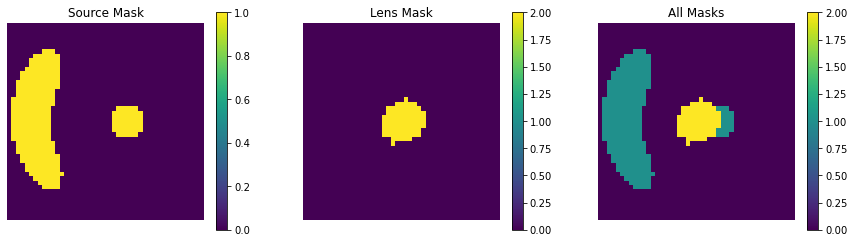

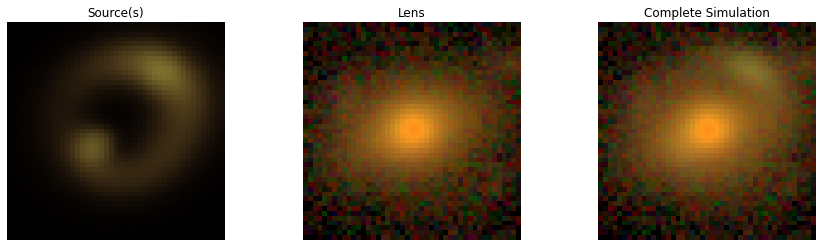

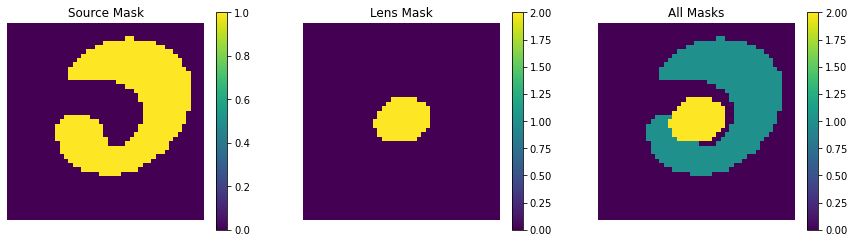

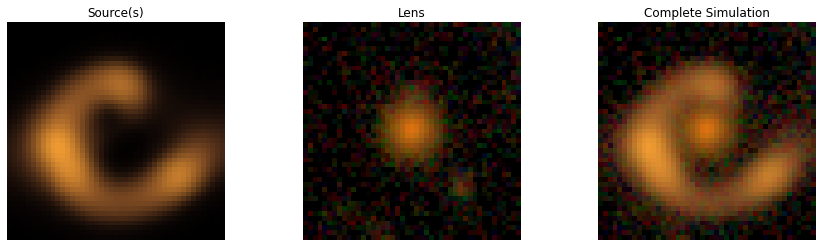

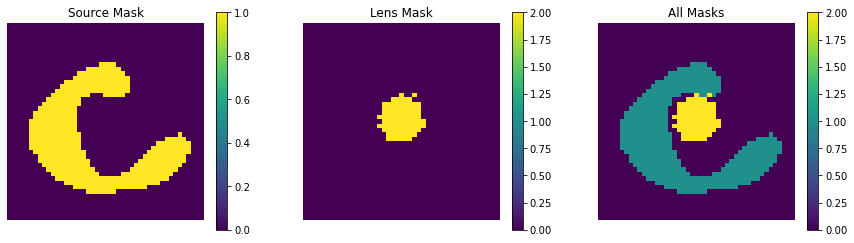

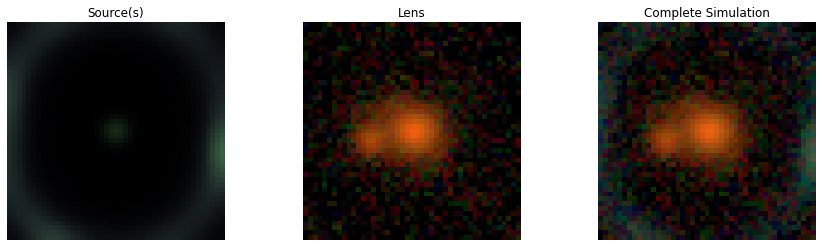

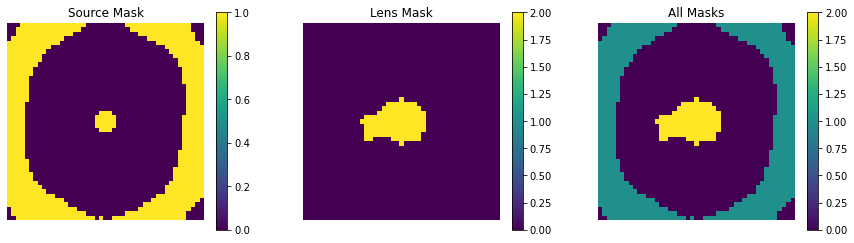

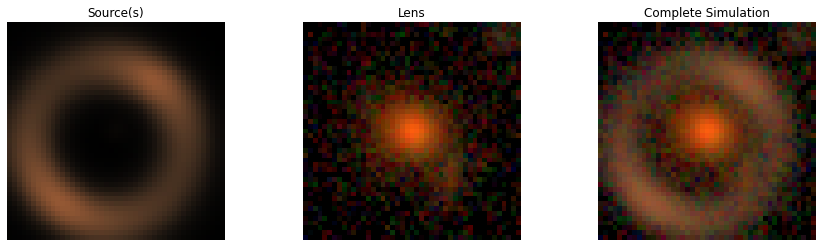

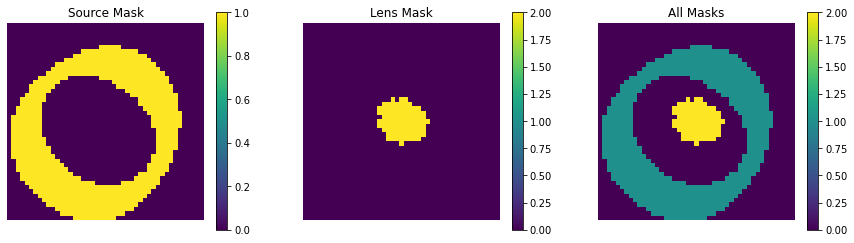

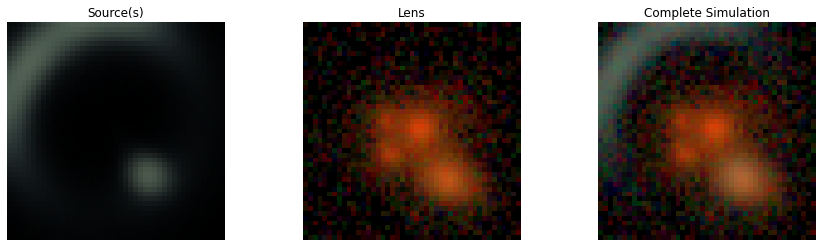

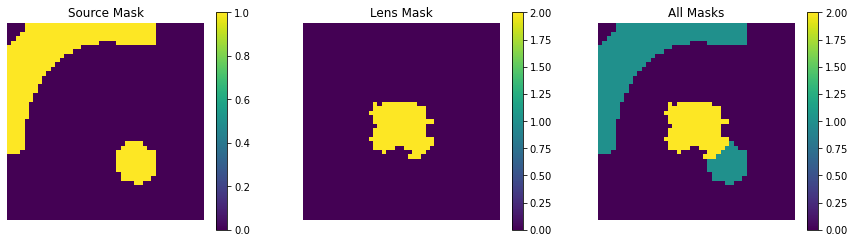

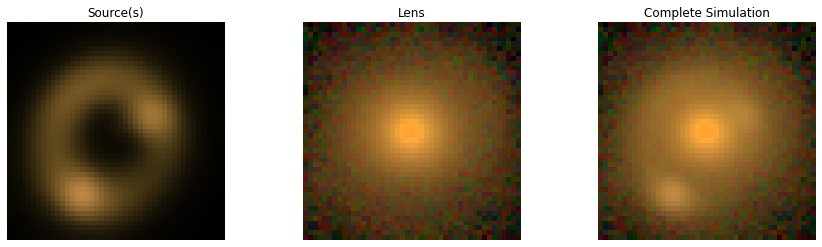

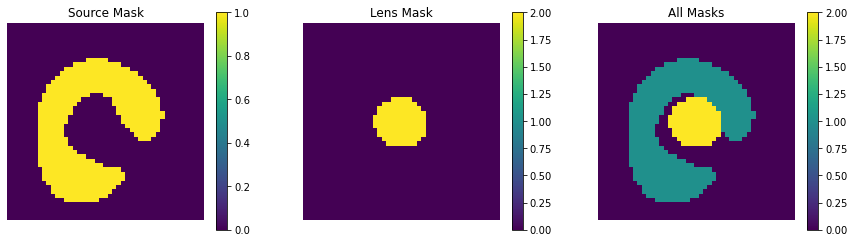

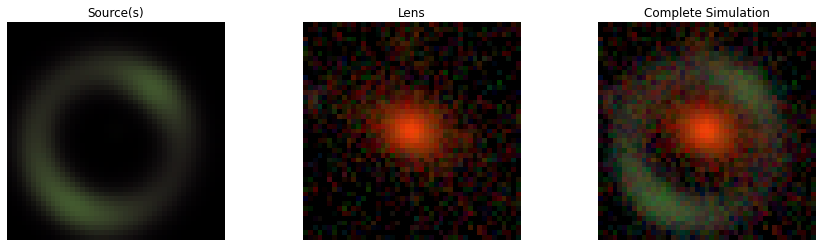

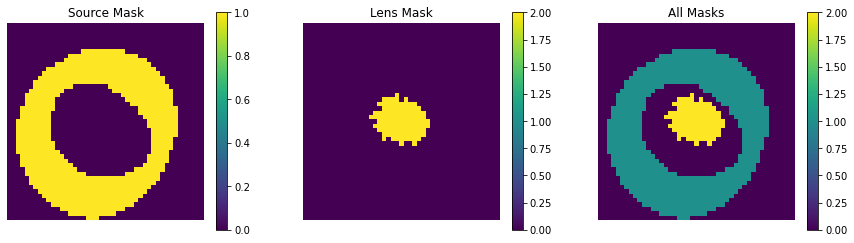

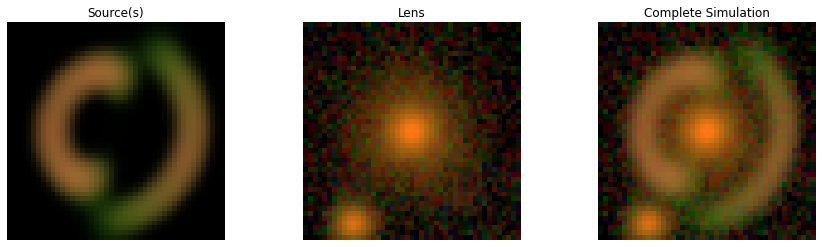

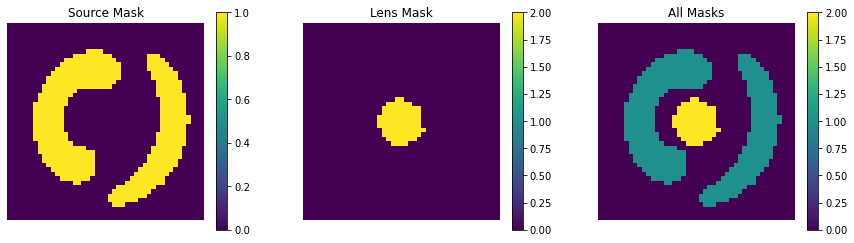

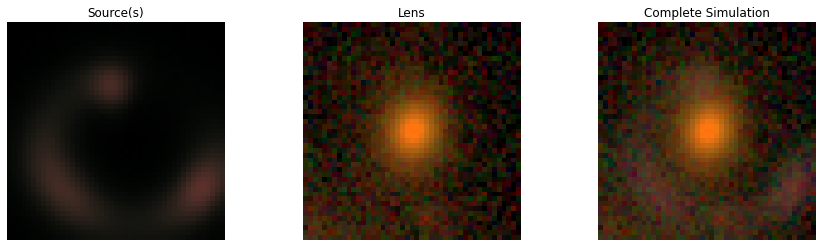

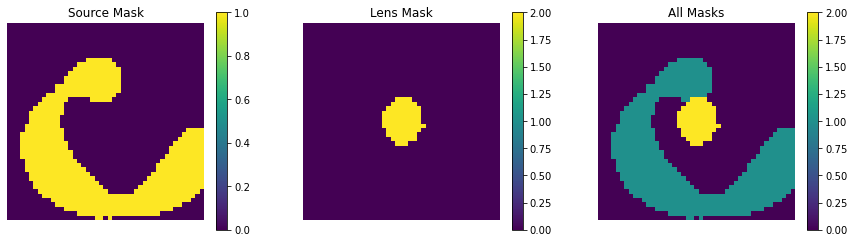

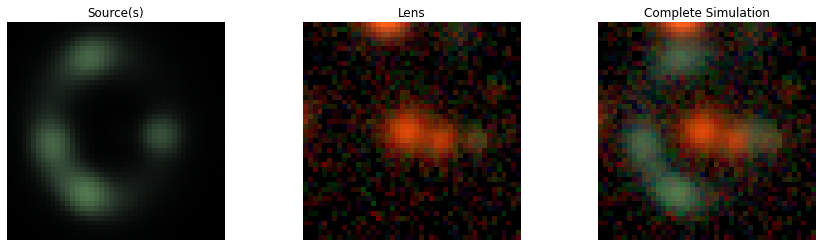

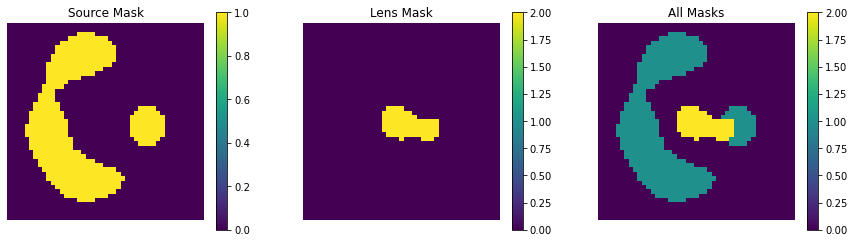

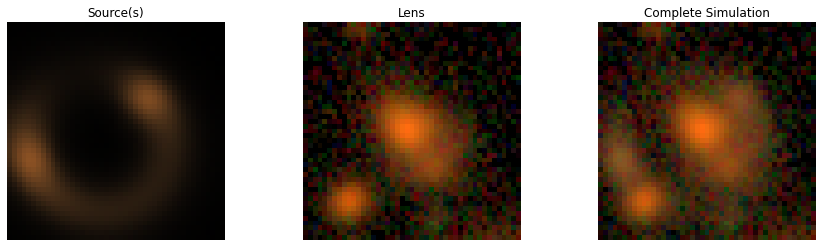

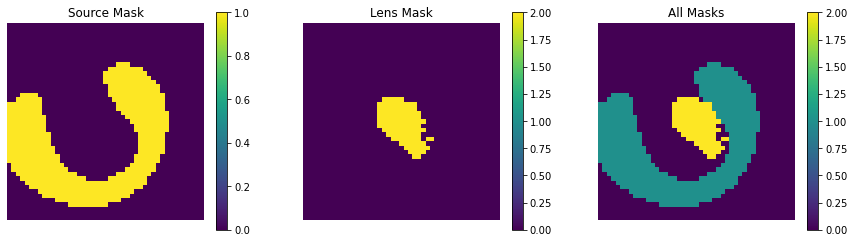

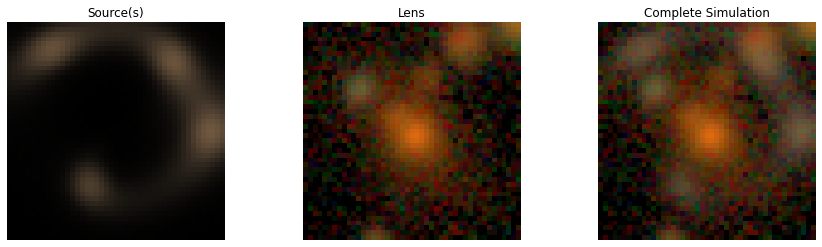

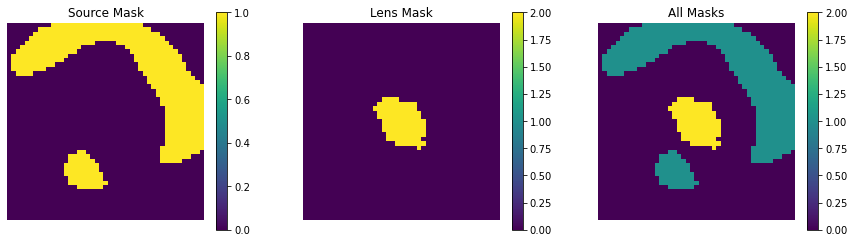

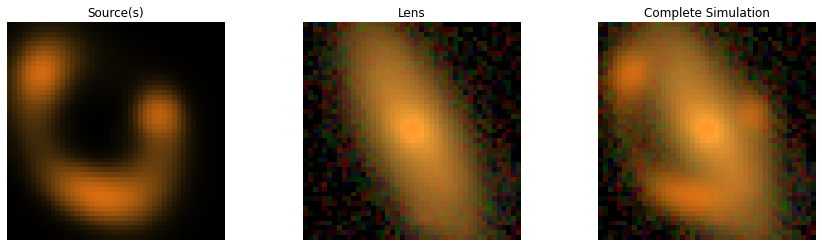

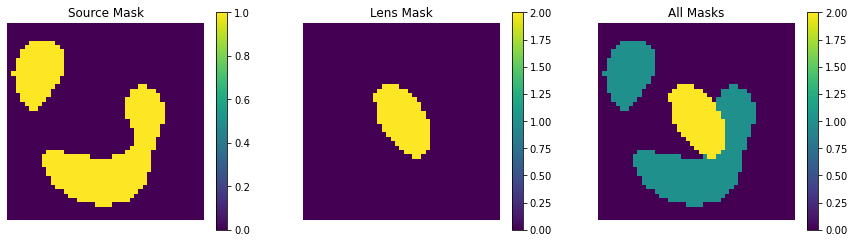

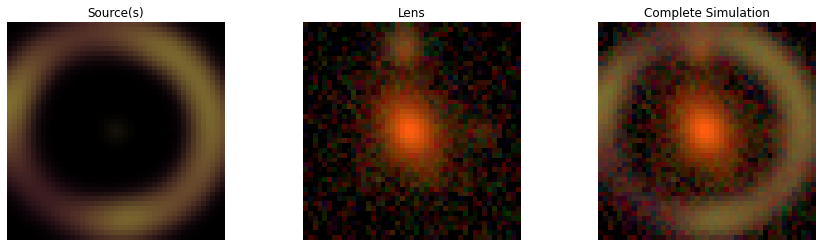

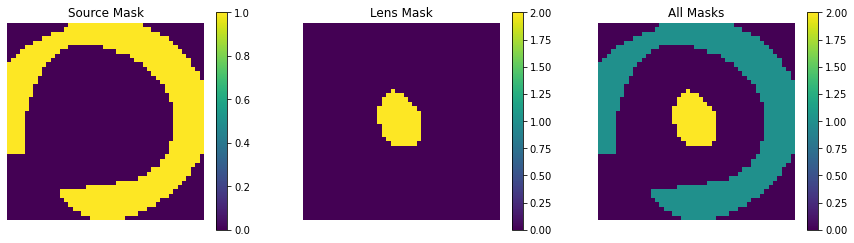

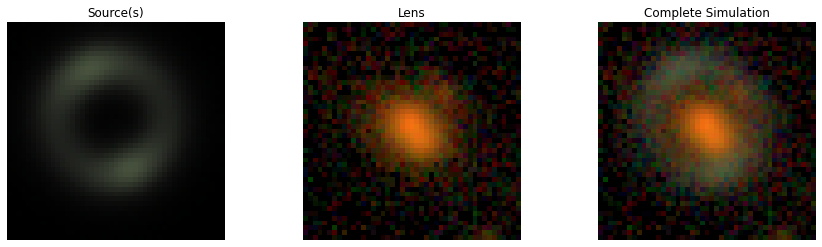

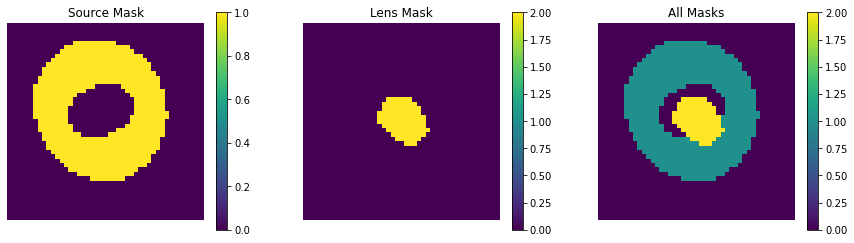

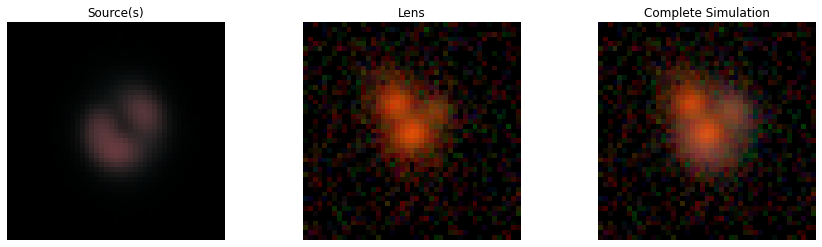

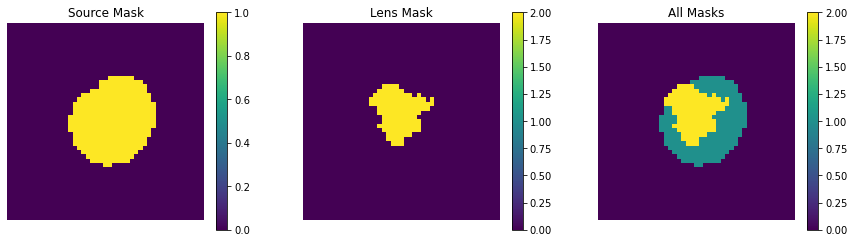

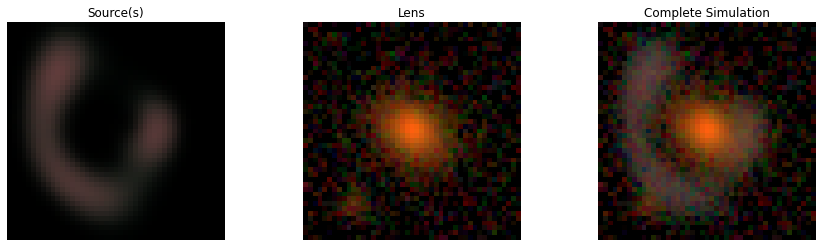

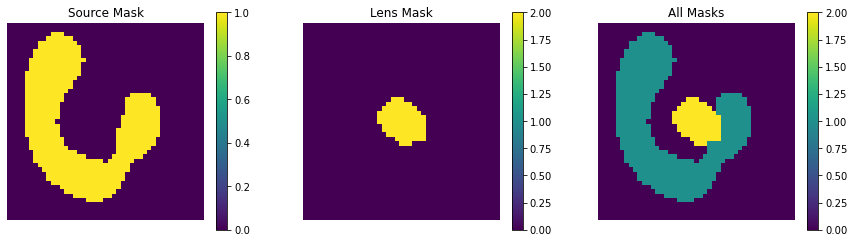

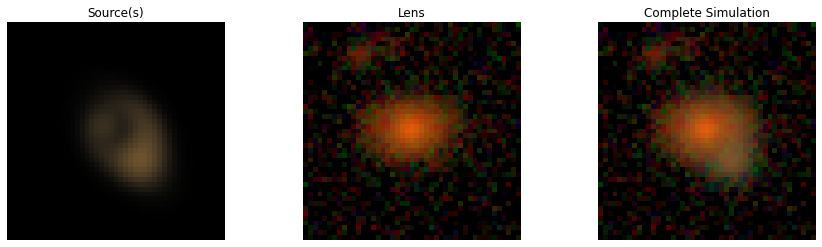

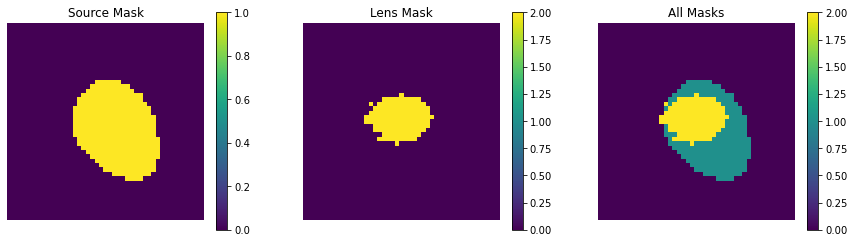

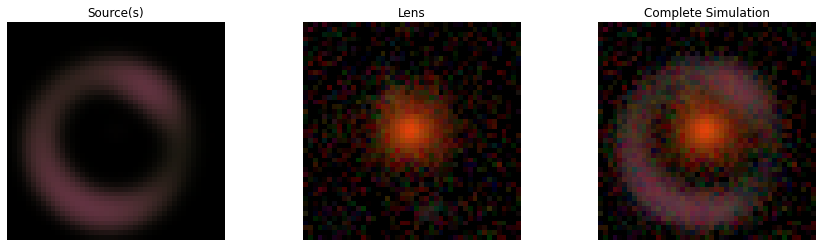

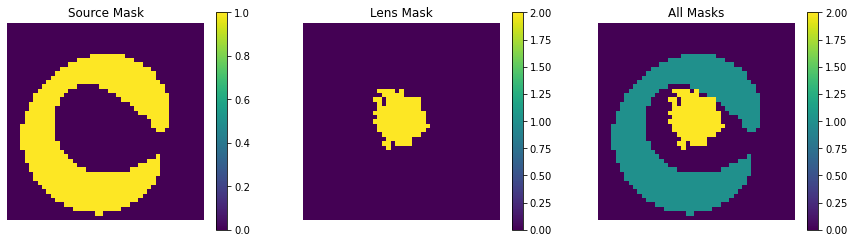

In [58]:
for coadd_id in coadd_list:
    mask_image(coadd_id)